In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_base = pd.read_csv('2020-03-13_174502_base.csv', index_col=0, parse_dates=True)
df_opti = pd.read_csv('2020-03-13_174502_opti.csv', index_col=0, parse_dates=True)

In [3]:
start_date = df_base.index[0].date()
end_date = df_base.index[-1].date()

In [4]:
print(start_date, end_date)

2019-05-29 2020-03-13


In [5]:
cost = [df_base['total_cost'].sum()/10**3,
        df_opti['total_cost'].sum()/10**3]

In [6]:
(cost[0]-cost[1])

144.49340855818232

In [7]:
(cost[0]-cost[1])/cost[0]

0.3967941057614766

In [8]:
df_base['power_trade'] = df_base['power_buy']-df_base['power_sell']
df_opti['power_trade'] = df_opti['power_buy']-df_opti['power_sell']
df_base['battery_use'] = df_base['battery_discharge']-df_base['battery_charge']
df_opti['battery_use'] = df_opti['battery_discharge']-df_opti['battery_charge']

Text(0, 0.5, 'Costs [kSEK]')

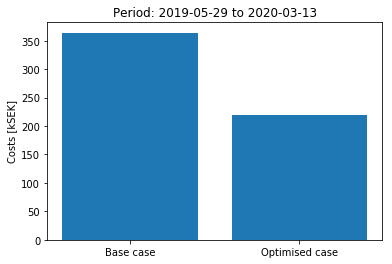

In [9]:
plt.bar(['Base case', 'Optimised case'], cost)
plt.title('Period: '+str(start_date)+' to '+str(end_date))
plt.ylabel('Costs [kSEK]')

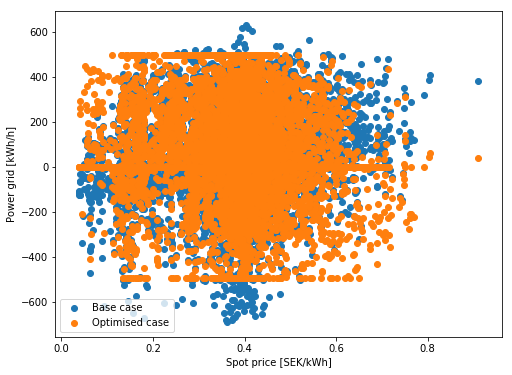

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df_base['price_buy'], df_base['power_trade'], label='Base case')
plt.scatter(df_opti['price_buy'], df_opti['power_trade'], label='Optimised case')
plt.xlabel('Spot price [SEK/kWh]')
plt.ylabel('Power grid [kWh/h]')
plt.legend(loc='lower left')

In [11]:
df_opti['power_trade'].abs().max()

495.41005352858076

In [12]:
df_base['power_trade'].abs().max()

689.2379542174411

/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


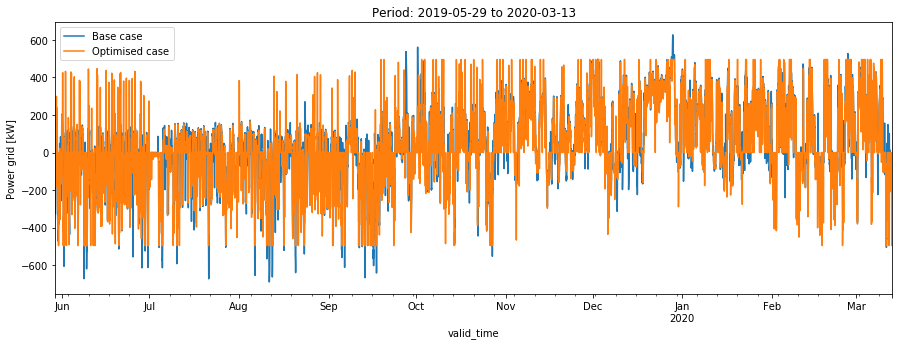

In [13]:
df_base['power_trade'].plot(label='Base case', figsize=(15,5))
df_opti['power_trade'].plot(label='Optimised case')
plt.title('Period: '+str(start_date)+' to '+str(end_date))
plt.ylabel('Power grid [kW]')
plt.legend()

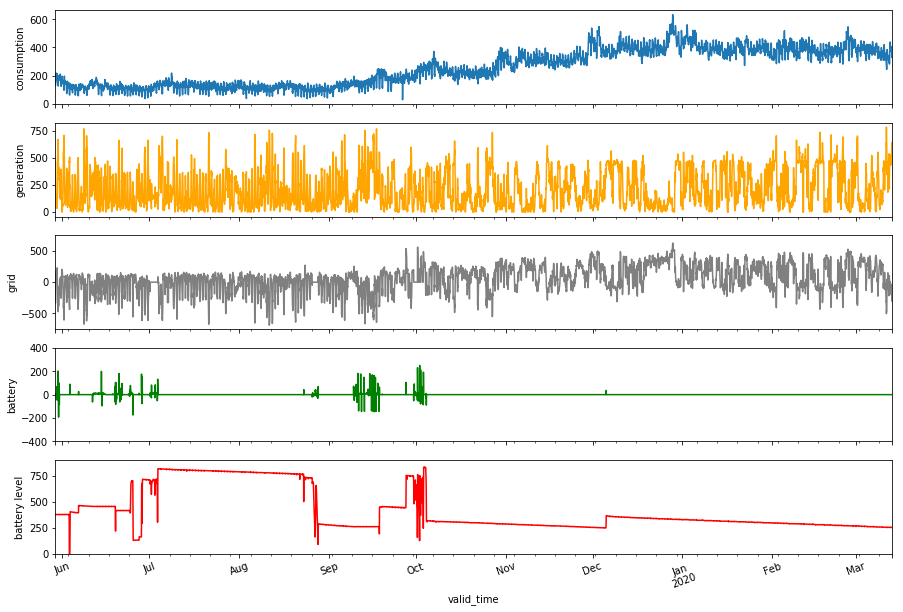

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,10))
df_base['consumption'].plot(ax=ax[0])
ax[0].set_ylabel('consumption')
df_base['generation'].plot(ax=ax[1], color='orange')
ax[1].set_ylabel('generation')
df_base['power_trade'].plot(ax=ax[2], color='gray')
ax[2].set_ylabel('grid')
ax[2].set_ylim([-750, 750])
df_base['battery_use'].plot(ax=ax[3], color='green')
ax[3].set_ylabel('battery')
ax[3].set_ylim([-400, 400])
df_base['battery_state'].plot(ax=ax[4], color='red')
ax[4].set_ylabel('battery level')
ax[4].set_ylim([0, 900])
_ = plt.xticks(rotation=20)

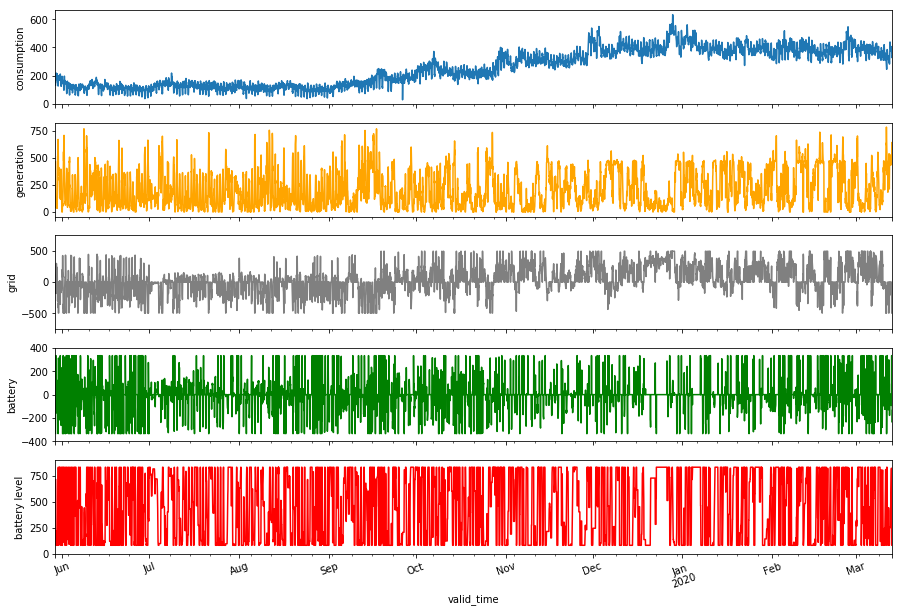

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,10))
df_opti['consumption'].plot(ax=ax[0])
ax[0].set_ylabel('consumption')
df_opti['generation'].plot(ax=ax[1], color='orange')
ax[1].set_ylabel('generation')
df_opti['power_trade'].plot(ax=ax[2], color='gray')
#ax[2].axhline(y=df_opti['power_trade'].max(), color='r', linestyle='--')
#ax[2].axhline(y=df_opti['power_trade'].min(), color='r', linestyle='--')
ax[2].set_ylabel('grid')
ax[2].set_ylim([-750, 750])
df_opti['battery_use'].plot(ax=ax[3], color='green')
ax[3].set_ylabel('battery')
ax[3].set_ylim([-400, 400])
df_opti['battery_state'].plot(ax=ax[4], color='red')
ax[4].set_ylabel('battery level')
ax[4].set_ylim([0, 900])
_ = plt.xticks(rotation=20)